In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [2]:
df = pd.read_csv('Lighthouse_Healthcare.csv')
df.head()

/tmp/ipykernel_21017/3451136415.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Lighthouse_Healthcare.csv')


,topic_id,subreddit_id,comment_id,comment_body,comment_score,comment_permalink,comment_subreddit_list,time,parent_id,link_id,ups,downs,is_submitter,stickied,gilded,edited,distinguished,replies,author,user_id
0,108bqhz,t5_2tesr,j3wrm3k,i might be off base here but gone are the days...,1.0,/r/bapcsalescanada/comments/108bqhz/cpu_amd_ry...,bapcsalescanada,01/11/23 16:34:25,t1_j3u00rt,t3_108bqhz,1.0,0.0,False,False,0.0,not edited,NaN,[],somewhat_moist,9rstu9i1
1,108bqhz,t5_2tesr,j3u7lk2,tbf everyone is a ruthless bitch. you give the...,7.0,/r/bapcsalescanada/comments/108bqhz/cpu_amd_ry...,bapcsalescanada,01/11/23 02:21:56,t1_j3tvvzf,t3_108bqhz,7.0,0.0,False,False,0.0,not edited,NaN,[],telepathicdragon,56kci
2,107paa1,t5_2tzuf,j41b2h7,oct 11 in simco two police officers shot and k...,1.0,/r/canadaguns/comments/107paa1/canadian_gun_la...,canadaguns,01/12/23 14:19:19,t1_j3tggke,t3_107paa1,1.0,0.0,False,False,0.0,not edited,NaN,['j429n5j'],super-sonic-sloth,4dfgzi5r
3,10ahwqf,t5_2tzuf,j46icz7,i wish this is the kind of stuff our governmen...,5.0,/r/canadaguns/comments/10ahwqf/carleton_univer...,canadaguns,01/13/23 14:43:19,t3_10ahwqf,t3_10ahwqf,5.0,0.0,False,False,0.0,not edited,NaN,['j46winx'],Firepower01,7qmw9
4,1071tm6,t5_425dri,j3olavf,"yeah, i know, i could have, but after trying a...",3.0,/r/canadahousing/comments/1071tm6/hindsight_is...,canadahousing,01/10/23 00:18:41,t1_j3n3cwu,t3_1071tm6,3.0,0.0,False,False,0.0,not edited,NaN,[],LoganN64,4mfleu4q


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32835 entries, 0 to 32834
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   topic_id                32835 non-null  object 
 1   subreddit_id            32835 non-null  object 
 2   comment_id              32835 non-null  object 
 3   comment_body            32835 non-null  object 
 4   comment_score           32835 non-null  float64
 5   comment_permalink       32835 non-null  object 
 6   comment_subreddit_list  32835 non-null  object 
 7   time                    32835 non-null  object 
 8   parent_id               32835 non-null  object 
 9   link_id                 32835 non-null  object 
 10  ups                     32835 non-null  float64
 11  downs                   32835 non-null  float64
 12  is_submitter            32835 non-null  bool   
 13  stickied                32835 non-null  bool   
 14  gilded                  32835 non-null

In [4]:
df.isnull().sum()

topic_id                      0
subreddit_id                  0
comment_id                    0
comment_body                  0
comment_score                 0
comment_permalink             0
comment_subreddit_list        0
time                          0
parent_id                     0
link_id                       0
ups                           0
downs                         0
is_submitter                  0
stickied                      0
gilded                        0
edited                        0
distinguished             32824
replies                       0
author                        0
user_id                       0
dtype: int64

In [5]:
# df.dropna(inplace=True)
# df.isnull().sum()

df = df.drop(columns=['distinguished'])


In [6]:
df.isnull().sum()

topic_id                  0
subreddit_id              0
comment_id                0
comment_body              0
comment_score             0
comment_permalink         0
comment_subreddit_list    0
time                      0
parent_id                 0
link_id                   0
ups                       0
downs                     0
is_submitter              0
stickied                  0
gilded                    0
edited                    0
replies                   0
author                    0
user_id                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32835 entries, 0 to 32834
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   topic_id                32835 non-null  object 
 1   subreddit_id            32835 non-null  object 
 2   comment_id              32835 non-null  object 
 3   comment_body            32835 non-null  object 
 4   comment_score           32835 non-null  float64
 5   comment_permalink       32835 non-null  object 
 6   comment_subreddit_list  32835 non-null  object 
 7   time                    32835 non-null  object 
 8   parent_id               32835 non-null  object 
 9   link_id                 32835 non-null  object 
 10  ups                     32835 non-null  float64
 11  downs                   32835 non-null  float64
 12  is_submitter            32835 non-null  bool   
 13  stickied                32835 non-null  bool   
 14  gilded                  32835 non-null

In [8]:
len(df['comment_subreddit_list'].unique())

118

In [9]:
# Group by 'comment_subreddit_list' and count occurrences of 'comment_body'
comment_counts = df.groupby('comment_subreddit_list')['comment_body'].count()

# If you want to see the counts for each subreddit list
print(comment_counts)

comment_subreddit_list
adhd_britishcolumbia      70
aish_alberta               2
alberta                 2178
albertamentalhealth        3
albertapolitics          955
                        ... 
walmartcanada             25
weddingscanada             5
whitbyontario              7
windsorontario           146
yukon                     33
Name: comment_body, Length: 118, dtype: int64


In [10]:
print(f"Average number of comments is {comment_counts.mean()}")
print(f"Maximum number of comments is {comment_counts.max()}")
print(f"Minumum number of comments is {comment_counts.min()}")

Average number of comments is 278.26271186440675
Maximum number of comments is 5637
Minumum number of comments is 1


Retaining the comments of subreddit groups who posted at least average number of comments

   comment_subreddit_list  comment_body
2                 alberta          2178
4         albertapolitics           955
7         babybumpscanada           303
11        britishcolumbia           885
13                 canada          2948
14             canada_sub          5637
20          canadahousing          1639
21         canadahousing2          2728
26         canadapolitics           577
29   canadapublicservants           841
48        kingstonontario           298
55               manitoba           511
62         movingtocanada           824
64     newbrunswickcanada           771
67             novascotia           468
71                ontario          3934
76        ontariograde12s           334
78        ontariolandlord           436
79            ontarionews           309
89                    pei           486
91  personalfinancecanada          1237
99           saskatchewan          1100


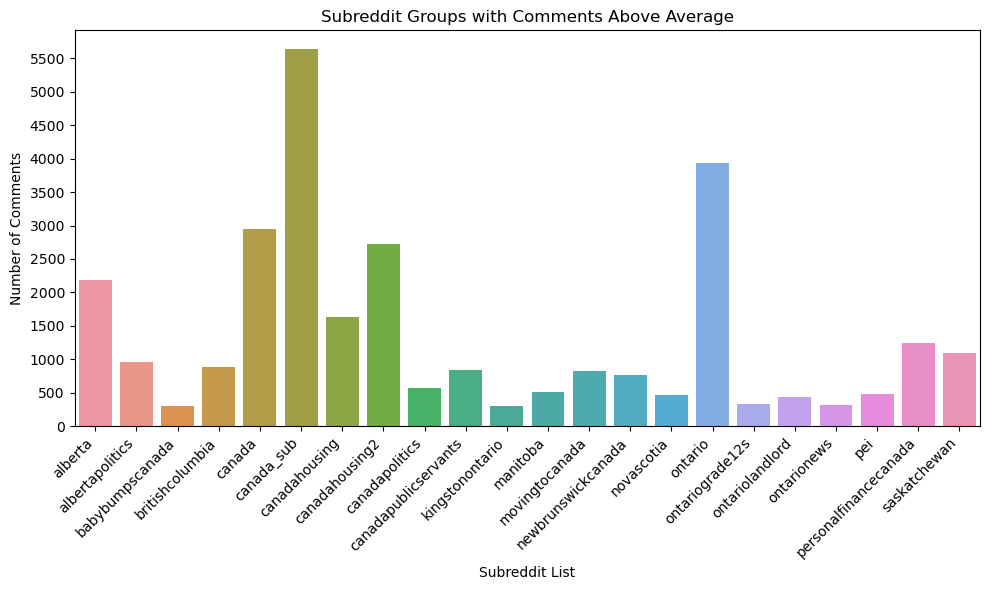

In [11]:
# Reset the index to convert the series to a DataFrame
comment_counts_df = comment_counts.reset_index()

# Calculate the average number of comments
average_comments = comment_counts_df['comment_body'].mean()

# Filter subreddit groups with counts greater than or equal to the average
subreddits_above_average = comment_counts_df[comment_counts_df['comment_body'] >= average_comments]

print(subreddits_above_average)

plt.figure(figsize=(10, 6))
sns.barplot(x='comment_subreddit_list', y='comment_body', data=subreddits_above_average)
plt.xlabel('Subreddit List')
plt.ylabel('Number of Comments')
plt.title('Subreddit Groups with Comments Above Average')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Set the frequency of y-axis ticks
tick_frequency = 500  # Adjust as needed
plt.yticks(range(0, int(subreddits_above_average['comment_body'].max()), tick_frequency))

plt.tight_layout()
plt.show()

# Final DataFrame with the Selected Subreddit Groups

In [12]:
# Merge subreddits_above_average with the original DataFrame to retain comment_body for future analysis
subreddits_above_average = pd.merge(subreddits_above_average, df, on = 'comment_subreddit_list', how='inner')

In [13]:
subreddits_above_average.head()

,comment_subreddit_list,comment_body_x,topic_id,subreddit_id,comment_id,comment_body_y,comment_score,comment_permalink,time,parent_id,link_id,ups,downs,is_submitter,stickied,gilded,edited,replies,author,user_id
0,alberta,2178,10ejngo,t5_2qxon,j4sekx2,every time she says something stupid though pe...,-3.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/17/23 15:52:39,t3_10ejngo,t3_10ejngo,-3.0,0.0,False,False,0.0,not edited,['j4u9sxk'],Cautious_Major_6693,7y3vrsrj
1,alberta,2178,10ejngo,t5_2qxon,j4u9sxk,when it comes to separation and healthcare sev...,1.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/18/23 01:11:10,t1_j4sekx2,t3_10ejngo,1.0,0.0,False,False,0.0,not edited,[],Responsible_CDN_Duck,96pe6w5q
2,alberta,2178,10ejngo,t5_2qxon,j4rggkq,">well whoever writes for her should be fired, ...",28.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/17/23 12:20:15,t1_j4resyu,t3_10ejngo,28.0,0.0,False,False,0.0,not edited,"['j4rh504', 'j4stde8']",DVariant,d10n03wi
3,alberta,2178,10ejngo,t5_2qxon,j4yyg6o,why? so he can make education and health care ...,2.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/18/23 22:54:32,t1_j4resyu,t3_10ejngo,2.0,0.0,False,False,0.0,not edited,[],Perfect_Opposite2113,d1yqzbah
4,alberta,2178,10ejngo,t5_2qxon,j4rdo6k,that was fucking amazing. pardoning people for...,36.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/17/23 12:02:59,t1_j4rap4r,t3_10ejngo,36.0,0.0,False,False,0.0,not edited,[],clickmagnet,21uz0


In [14]:
len(subreddits_above_average['comment_subreddit_list'].unique())

22

Now we have 22 unique subreddit groups

<Axes: >

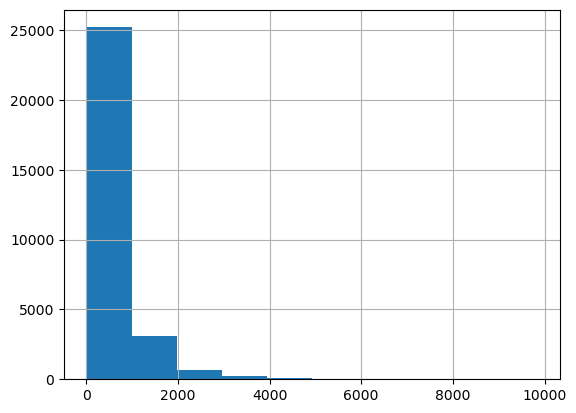

In [15]:
#histogram of sentence length by characters
subreddits_above_average['comment_body_y'].str.len().hist()

<Axes: >

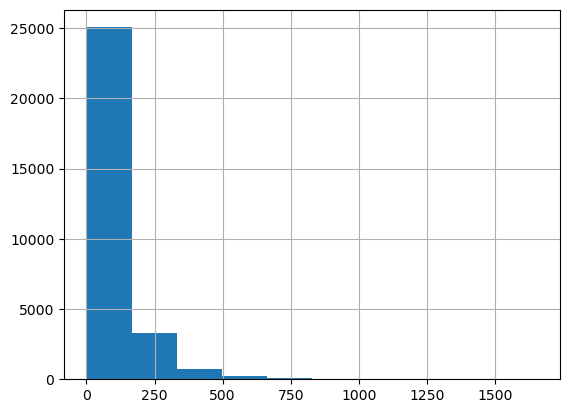

In [16]:
#histogram of sentence length by words
subreddits_above_average['comment_body_y'].str.split().map(lambda x: len(x)).hist()

<Axes: >

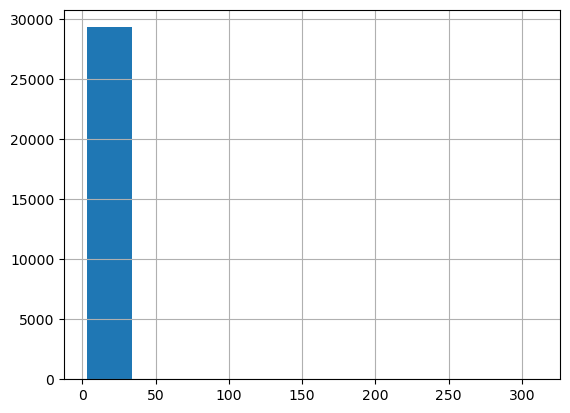

In [17]:
# Average Word Length
subreddits_above_average['comment_body_y'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

# Text Preprocessing

In [19]:
# lower casing
subreddits_above_average['comment_body_y'] = subreddits_above_average['comment_body_y'].apply(lambda x: x.lower())


In [20]:
# Remove digits and words containing digits
subreddits_above_average['comment_body_y'] = subreddits_above_average['comment_body_y'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [21]:
# Remove punctuations
subreddits_above_average['comment_body_y'] = subreddits_above_average['comment_body_y'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [22]:
# Removing extra spaces
subreddits_above_average['comment_body_y'] = subreddits_above_average['comment_body_y'].apply(lambda x: re.sub(' +',' ',x))

Checking some preprocessed comments

In [23]:
for index,text in enumerate(subreddits_above_average['comment_body_y'][35:40]):
  print('Comment %d:\n'%(index+1),text)

Comment 1:
 wow fascinating to watch give them everything to get voted in then take their cpp and health care to pay it back be careful what you wish for
Comment 2:
 yes its from taxes they are giving you your own money back instead of spending on things they should like healthcare and schools
Comment 3:
 take care of your health so you arent a strain on the system put down the pepsi and go for a walk
Comment 4:
 because giving to the andp means that public education and healthcare will be restored and grown to a level that actually supports all albertans and people who need help will get it

short term pain for long term gain

the ucp is rigging the system so the best thing wecan do is give it to the andp to find the campaign to replace the scumbag grifters
Comment 5:
 cmon it never would have gone to health care or education it would have gone to some expensive pointless consultation or bribe dollars


Remove Stopwords and Lemmatization

In [24]:

# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_lg',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
subreddits_above_average['lemmatized']=subreddits_above_average['comment_body_y'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [25]:
subreddits_above_average.head()

,comment_subreddit_list,comment_body_x,topic_id,subreddit_id,comment_id,comment_body_y,comment_score,comment_permalink,time,parent_id,...,ups,downs,is_submitter,stickied,gilded,edited,replies,author,user_id,lemmatized
0,alberta,2178,10ejngo,t5_2qxon,j4sekx2,every time she says something stupid though pe...,-3.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/17/23 15:52:39,t3_10ejngo,...,-3.0,0.0,False,False,0.0,not edited,['j4u9sxk'],Cautious_Major_6693,7y3vrsrj,time say stupid people genuinely trigger like ...
1,alberta,2178,10ejngo,t5_2qxon,j4u9sxk,when it comes to separation and healthcare sev...,1.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/18/23 01:11:10,t1_j4sekx2,...,1.0,0.0,False,False,0.0,not edited,[],Responsible_CDN_Duck,96pe6w5q,come separation healthcare announced ucp plan ...
2,alberta,2178,10ejngo,t5_2qxon,j4rggkq,well whoever writes for her should be fired or...,28.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/17/23 12:20:15,t1_j4resyu,...,28.0,0.0,False,False,0.0,not edited,"['j4rh504', 'j4stde8']",DVariant,d10n03wi,write fire shut word check \n\n write unfortun...
3,alberta,2178,10ejngo,t5_2qxon,j4yyg6o,why so he can make education and health care c...,2.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/18/23 22:54:32,t1_j4resyu,...,2.0,0.0,False,False,0.0,not edited,[],Perfect_Opposite2113,d1yqzbah,education health care cut throw system chaos y...
4,alberta,2178,10ejngo,t5_2qxon,j4rdo6k,that was fucking amazing pardoning people for ...,36.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/17/23 12:02:59,t1_j4rap4r,...,36.0,0.0,False,False,0.0,not edited,[],clickmagnet,21uz0,fuck amazing pardon people violate health code...


Calculate Sentiment Scores using VADER

In [26]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['pos'], scores['neg'], scores['neu'], scores['compound']

# # # List of example texts to analyze
# texts = [
#     "I love this product! It works great and is very affordable.",
#     "This product is okay. It gets the job done, but could be better.",
#     "I hate this product. It doesn't work at all and is a waste of money."
# ]

# sample_df = pd.DataFrame({'texts': ["I love this product! It works great and is very affordable.",
#                                     "This product is okay. It gets the job done, but could be better.",
#                                     "I hate this product. It doesn't work at all and is a waste of money."]
#                                     })
# print(sample_df.head())

# for text in texts:
#     print(sid.polarity_scores(text)['pos'], sid.polarity_scores(text)['neg'], sid.polarity_scores(text)['neu'], sid.polarity_scores(text)['compound'])



    
# sample_df['density_positive'], sample_df['density_negative'], sample_df['density_neutral'], sample_df['density_compund'] = zip(*sample_df['texts'].apply(vader_sentiment))



In [27]:
subreddits_above_average['density_positive'], subreddits_above_average['density_negative'], subreddits_above_average['density_neutral'], subreddits_above_average['density_compound'] = zip(*subreddits_above_average['comment_body_y'].apply(vader_sentiment))

In [28]:
subreddits_above_average.head()

,comment_subreddit_list,comment_body_x,topic_id,subreddit_id,comment_id,comment_body_y,comment_score,comment_permalink,time,parent_id,...,gilded,edited,replies,author,user_id,lemmatized,density_positive,density_negative,density_neutral,density_compound
0,alberta,2178,10ejngo,t5_2qxon,j4sekx2,every time she says something stupid though pe...,-3.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/17/23 15:52:39,t3_10ejngo,...,0.0,not edited,['j4u9sxk'],Cautious_Major_6693,7y3vrsrj,time say stupid people genuinely trigger like ...,0.144,0.078,0.778,0.2263
1,alberta,2178,10ejngo,t5_2qxon,j4u9sxk,when it comes to separation and healthcare sev...,1.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/18/23 01:11:10,t1_j4sekx2,...,0.0,not edited,[],Responsible_CDN_Duck,96pe6w5q,come separation healthcare announced ucp plan ...,0.045,0.080,0.875,-0.5267
2,alberta,2178,10ejngo,t5_2qxon,j4rggkq,well whoever writes for her should be fired or...,28.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/17/23 12:20:15,t1_j4resyu,...,0.0,not edited,"['j4rh504', 'j4stde8']",DVariant,d10n03wi,write fire shut word check \n\n write unfortun...,0.228,0.176,0.596,0.7831
3,alberta,2178,10ejngo,t5_2qxon,j4yyg6o,why so he can make education and health care c...,2.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/18/23 22:54:32,t1_j4resyu,...,0.0,not edited,[],Perfect_Opposite2113,d1yqzbah,education health care cut throw system chaos y...,0.196,0.260,0.545,-0.2500
4,alberta,2178,10ejngo,t5_2qxon,j4rdo6k,that was fucking amazing pardoning people for ...,36.0,/r/alberta/comments/10ejngo/danielle_smith_has...,01/17/23 12:02:59,t1_j4rap4r,...,0.0,not edited,[],clickmagnet,21uz0,fuck amazing pardon people violate health code...,0.377,0.141,0.482,0.7070


# EDA on Sentiment Polarity Scores

1. Distribution of Sentiment Scores: Visualize the distribution of each sentiment polarity score (positive, negative, neutral, and compound) 
to understand the overall sentiment distribution within each subreddit group. You can use histograms or kernel density plots for this analysis.

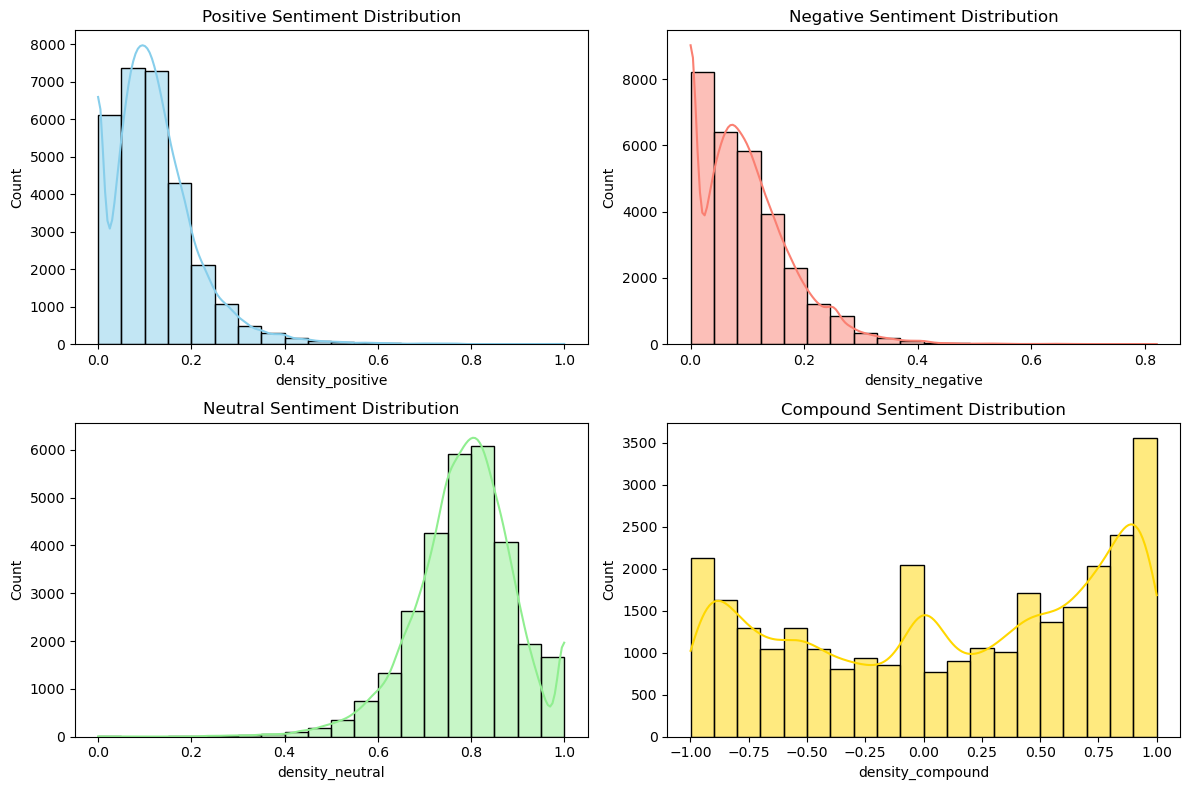

In [29]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for each sentiment polarity score
sns.histplot(subreddits_above_average['density_positive'], bins=20, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Positive Sentiment Distribution')

sns.histplot(subreddits_above_average['density_negative'], bins=20, kde=True, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Negative Sentiment Distribution')

sns.histplot(subreddits_above_average['density_neutral'], bins=20, kde=True, color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title('Neutral Sentiment Distribution')

sns.histplot(subreddits_above_average['density_compound'], bins=20, kde=True, color='gold', ax=axes[1, 1])
axes[1, 1].set_title('Compound Sentiment Distribution')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

2. Comparison across Subreddits: Compare the sentiment scores across different subreddit groups to 
identify variations in sentiment expression. Box plots or violin plots can be useful for visualizing the distribution of sentiment scores across multiple groups.

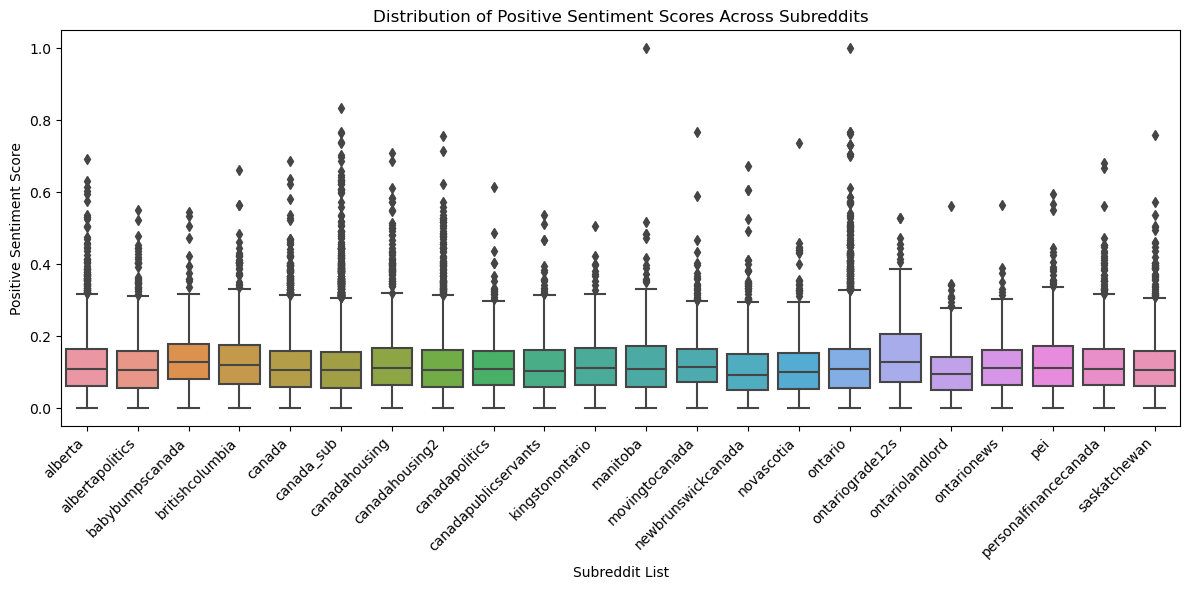

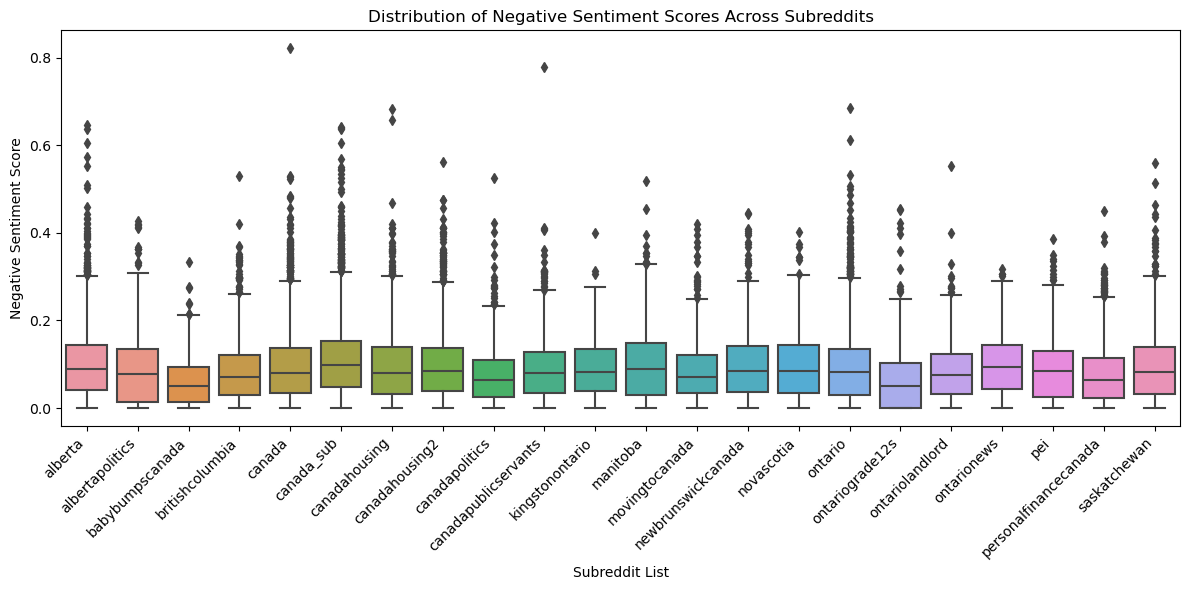

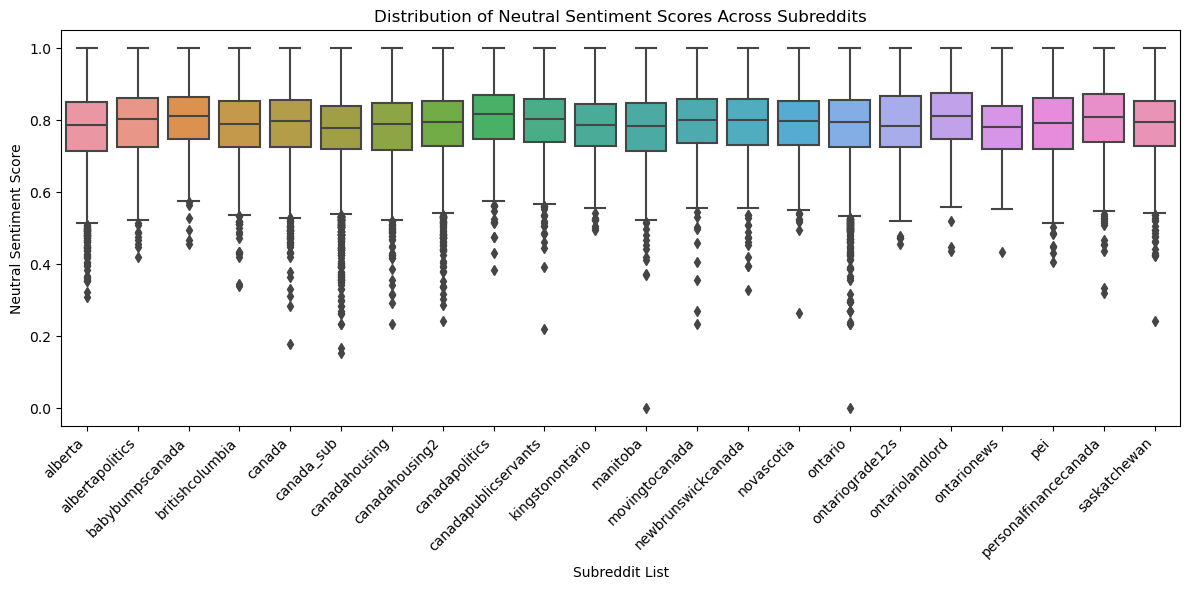

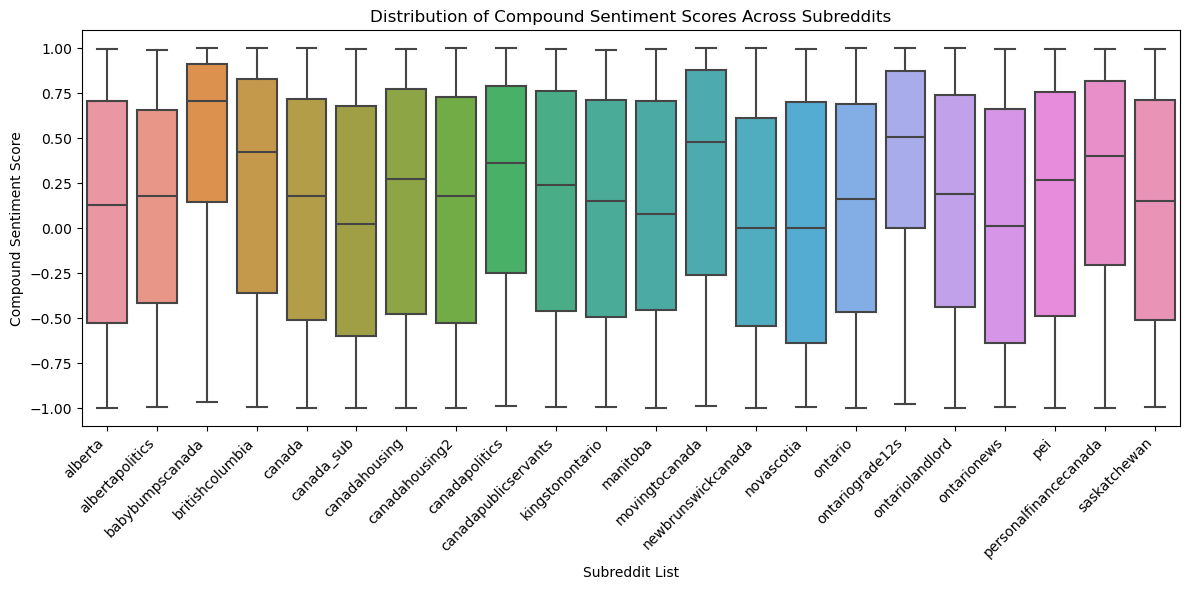

In [30]:
# Create a box plot for each sentiment polarity score
plt.figure(figsize=(12, 6))
sns.boxplot(x='comment_subreddit_list', y='density_positive', data=subreddits_above_average)
plt.xlabel('Subreddit List')
plt.ylabel('Positive Sentiment Score')
plt.title('Distribution of Positive Sentiment Scores Across Subreddits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='comment_subreddit_list', y='density_negative', data=subreddits_above_average)
plt.xlabel('Subreddit List')
plt.ylabel('Negative Sentiment Score')
plt.title('Distribution of Negative Sentiment Scores Across Subreddits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='comment_subreddit_list', y='density_neutral', data=subreddits_above_average)
plt.xlabel('Subreddit List')
plt.ylabel('Neutral Sentiment Score')
plt.title('Distribution of Neutral Sentiment Scores Across Subreddits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='comment_subreddit_list', y='density_compound', data=subreddits_above_average)
plt.xlabel('Subreddit List')
plt.ylabel('Compound Sentiment Score')
plt.title('Distribution of Compound Sentiment Scores Across Subreddits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

3. Word Clouds: Generate word clouds based on the comments with high positive or negative sentiment scores to 
identify the most frequent words associated with each sentiment. This can provide qualitative insights into the topics or themes driving sentiment.

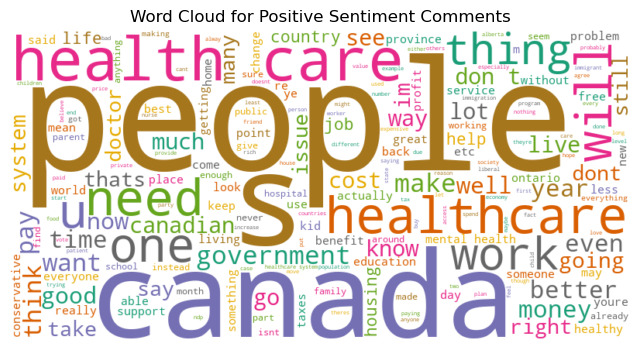

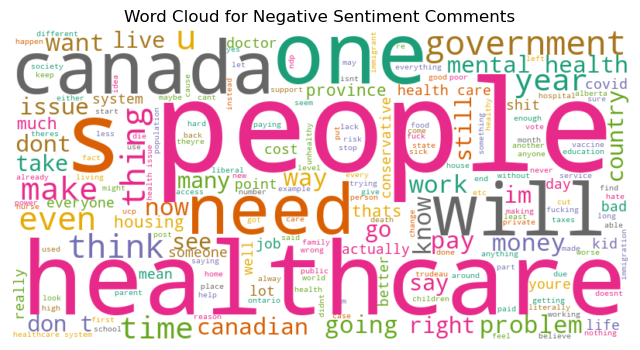

In [31]:
from wordcloud import WordCloud

# Filter comments with high positive sentiment scores
positive_comments = subreddits_above_average[subreddits_above_average['density_compound'] > 0.5]['comment_body_y']

# Join all positive comments into a single string
positive_text = ' '.join(positive_comments)

# Generate a word cloud for positive sentiment comments
wordcloud_positive = WordCloud(width=800, height=400, background_color="white", colormap="Dark2").generate(positive_text)

# Plot the word cloud for positive sentiment comments
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment Comments')
plt.axis('off')
plt.show()

# Filter comments with high negative sentiment scores
negative_comments = subreddits_above_average[subreddits_above_average['density_compound'] < -0.5]['comment_body_y']

# Join all negative comments into a single string
negative_text = ' '.join(negative_comments)

# Generate a word cloud for negative sentiment comments
wordcloud_negative = WordCloud(width=800, height=400, background_color="white", colormap="Dark2").generate(negative_text)

# Plot the word cloud for negative sentiment comments
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment Comments')
plt.axis('off')
plt.show()



# Time Series Analysis

First convert the 'time' to appropriate format

In [32]:
subreddits_above_average['time'] = pd.to_datetime(subreddits_above_average['time'], format='%m/%d/%y %H:%M:%S')

In [33]:
subreddits_above_average['time']

0       2023-01-17 15:52:39
1       2023-01-18 01:11:10
2       2023-01-17 12:20:15
3       2023-01-18 22:54:32
4       2023-01-17 12:02:59
                ...        
29394   2023-10-10 12:54:10
29395   2023-10-10 14:09:02
29396   2023-10-10 14:14:44
29397   2023-10-09 20:24:38
29398   2023-10-10 12:19:07
Name: time, Length: 29399, dtype: datetime64[ns]

4. Analyze the trends over time for the subreddit groups with the most negative polarity scores

In [34]:
# Find subreddit groups with the most negative polarity scores
top_negative_subreddits = subreddits_above_average.groupby('comment_subreddit_list')['density_negative'].mean().nlargest(5).index.tolist()
print(top_negative_subreddits)

# Filter data to include only comments from the identified subreddit groups
filtered_data = subreddits_above_average[subreddits_above_average['comment_subreddit_list'].isin(top_negative_subreddits)]
# print(filtered_data)

# Group filtered data by day and calculate mean sentiment scores
filtered_data['date'] = filtered_data['time'].dt.date
grouped_data = filtered_data.groupby(['comment_subreddit_list', 'date']).mean().reset_index()



['canada_sub', 'alberta', 'ontarionews', 'newbrunswickcanada', 'manitoba']


/tmp/ipykernel_21017/3638573315.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = filtered_data['time'].dt.date


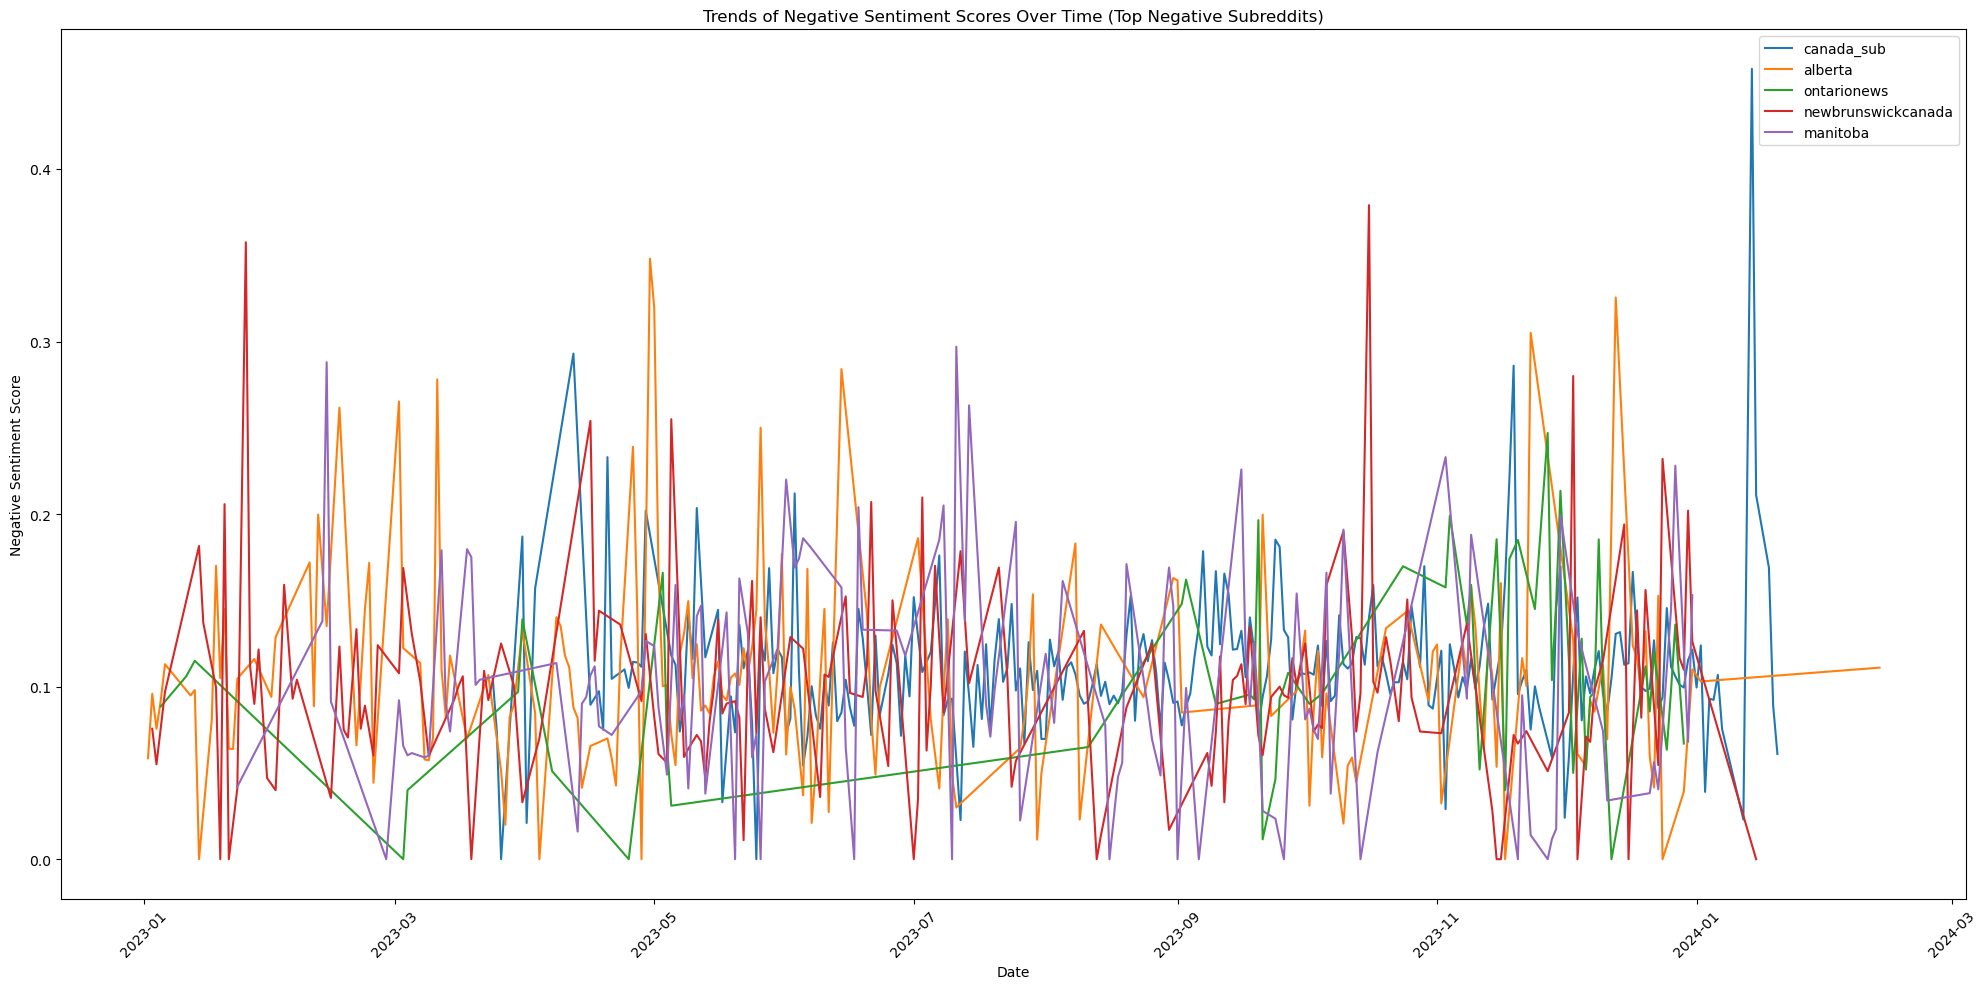

In [35]:
# Plot trends over time for the selected subreddit groups (negative polarity scores)
plt.figure(figsize=(20,10))

for subreddit in top_negative_subreddits:
    subreddit_data = grouped_data[grouped_data['comment_subreddit_list'] == subreddit]
    plt.plot(subreddit_data['date'], subreddit_data['density_negative'], label=subreddit)

plt.xlabel('Date')
plt.ylabel('Negative Sentiment Score')
plt.title('Trends of Negative Sentiment Scores Over Time (Top Negative Subreddits)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Compound Polarity Score Trend Analysis Over Time

Compound polarity scores represent the overall sentiment of a comment, taking into account both positive and negative sentiments. Analyzing trends in compound polarity scores can provide a more nuanced understanding of sentiment dynamics, capturing shifts between positive and negative sentiment over time. This can help identify trends such as changes in overall sentiment or fluctuations in user sentiment within subreddit groups.

/tmp/ipykernel_21017/3988660445.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = filtered_data['time'].dt.date


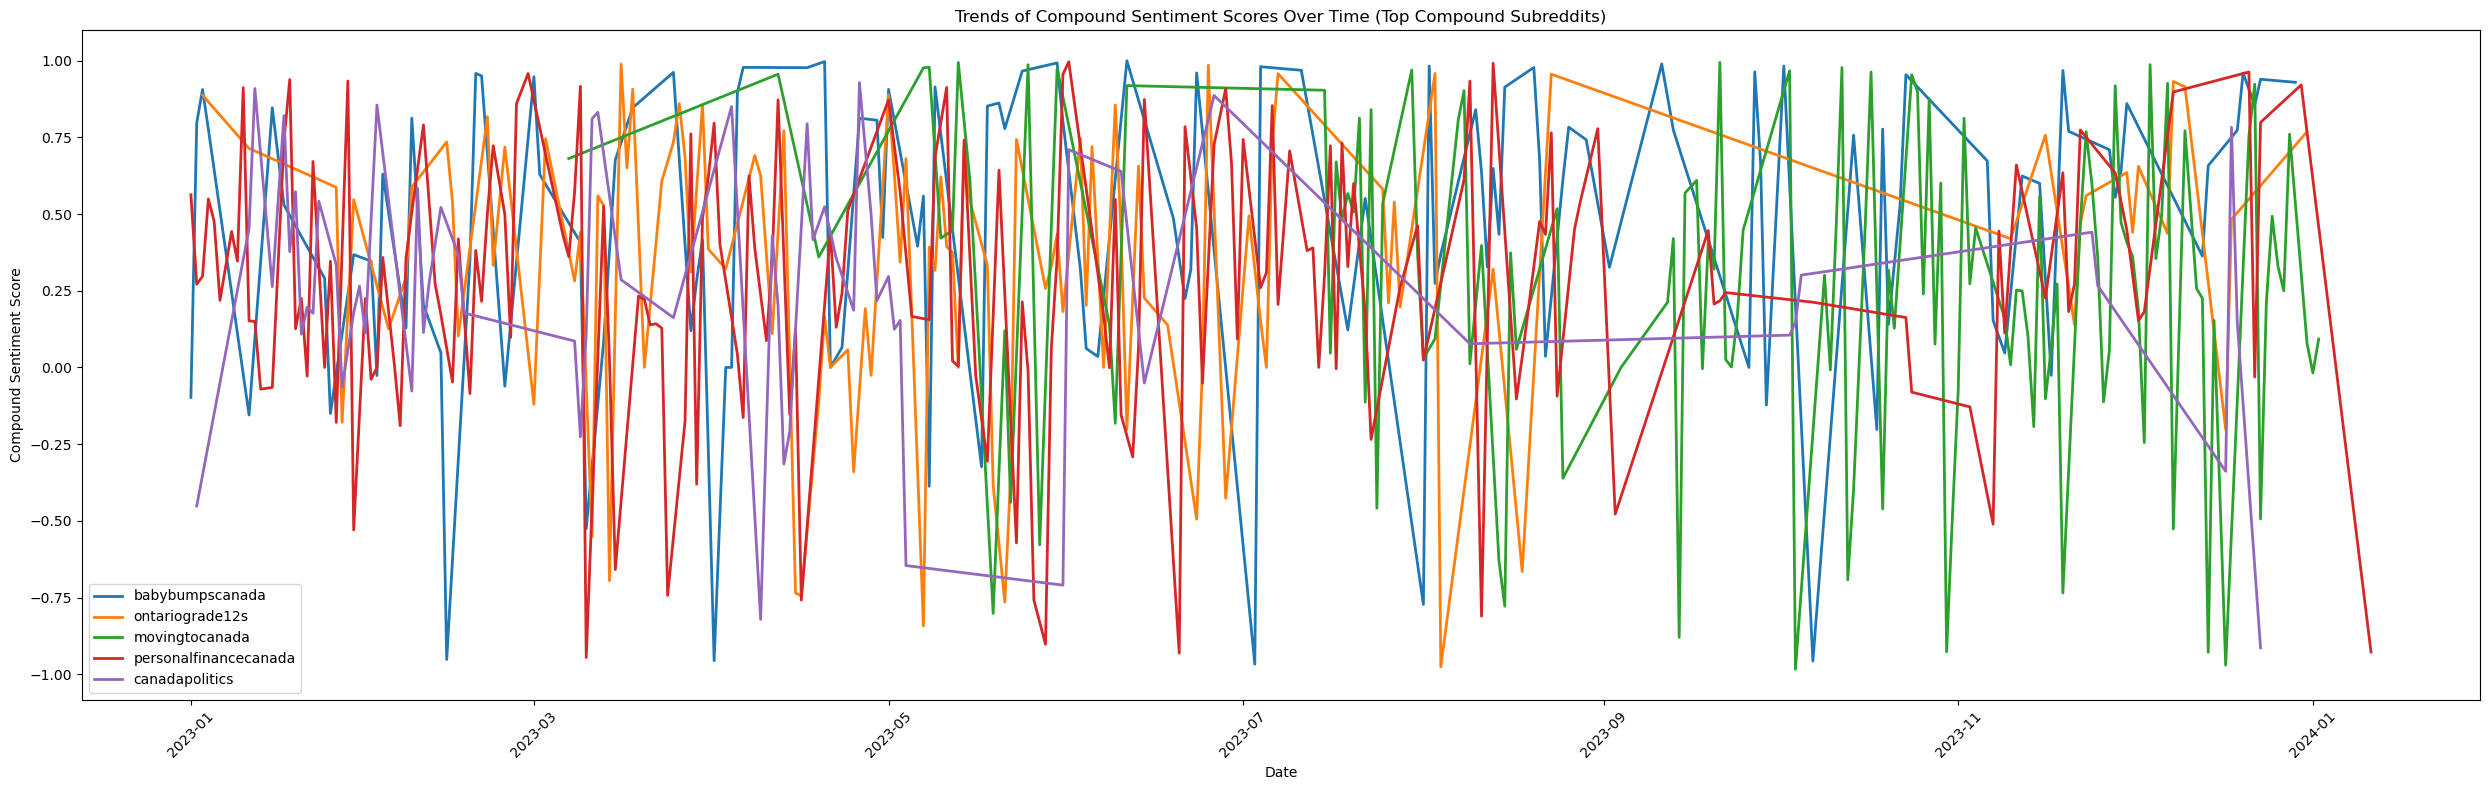

In [53]:
# Identify subreddit groups with the highest average compound polarity scores
top_compound_subreddits = subreddits_above_average.groupby('comment_subreddit_list')['density_compound'].mean().nlargest(5).index.tolist() # play with the nlargest

# Filter data to include only comments from the identified subreddit groups
filtered_data = subreddits_above_average[subreddits_above_average['comment_subreddit_list'].isin(top_compound_subreddits)]

# Group filtered data by day and calculate mean sentiment scores
filtered_data['date'] = filtered_data['time'].dt.date
grouped_data = filtered_data.groupby(['comment_subreddit_list', 'date']).mean().reset_index()

# Plot trends over time for the selected subreddit groups (compound polarity scores)
plt.figure(figsize=(25, 8))

for subreddit in top_compound_subreddits:
    subreddit_data = grouped_data[grouped_data['comment_subreddit_list'] == subreddit]
    plt.plot(subreddit_data['date'], subreddit_data['density_compound'], label=subreddit, linewidth=2)

plt.xlabel('Date')
plt.ylabel('Compound Sentiment Score')
plt.title('Trends of Compound Sentiment Scores Over Time (Top Compound Subreddits)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Heatmap: Create a heatmap where each row represents a subreddit group, and each column represents a time interval (e.g., day or week). Color code the cells based on the average sentiment score for each subreddit and time interval. This visualization can reveal patterns and trends across both subreddits and time.

/tmp/ipykernel_21017/3535218671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = filtered_data['time'].dt.date


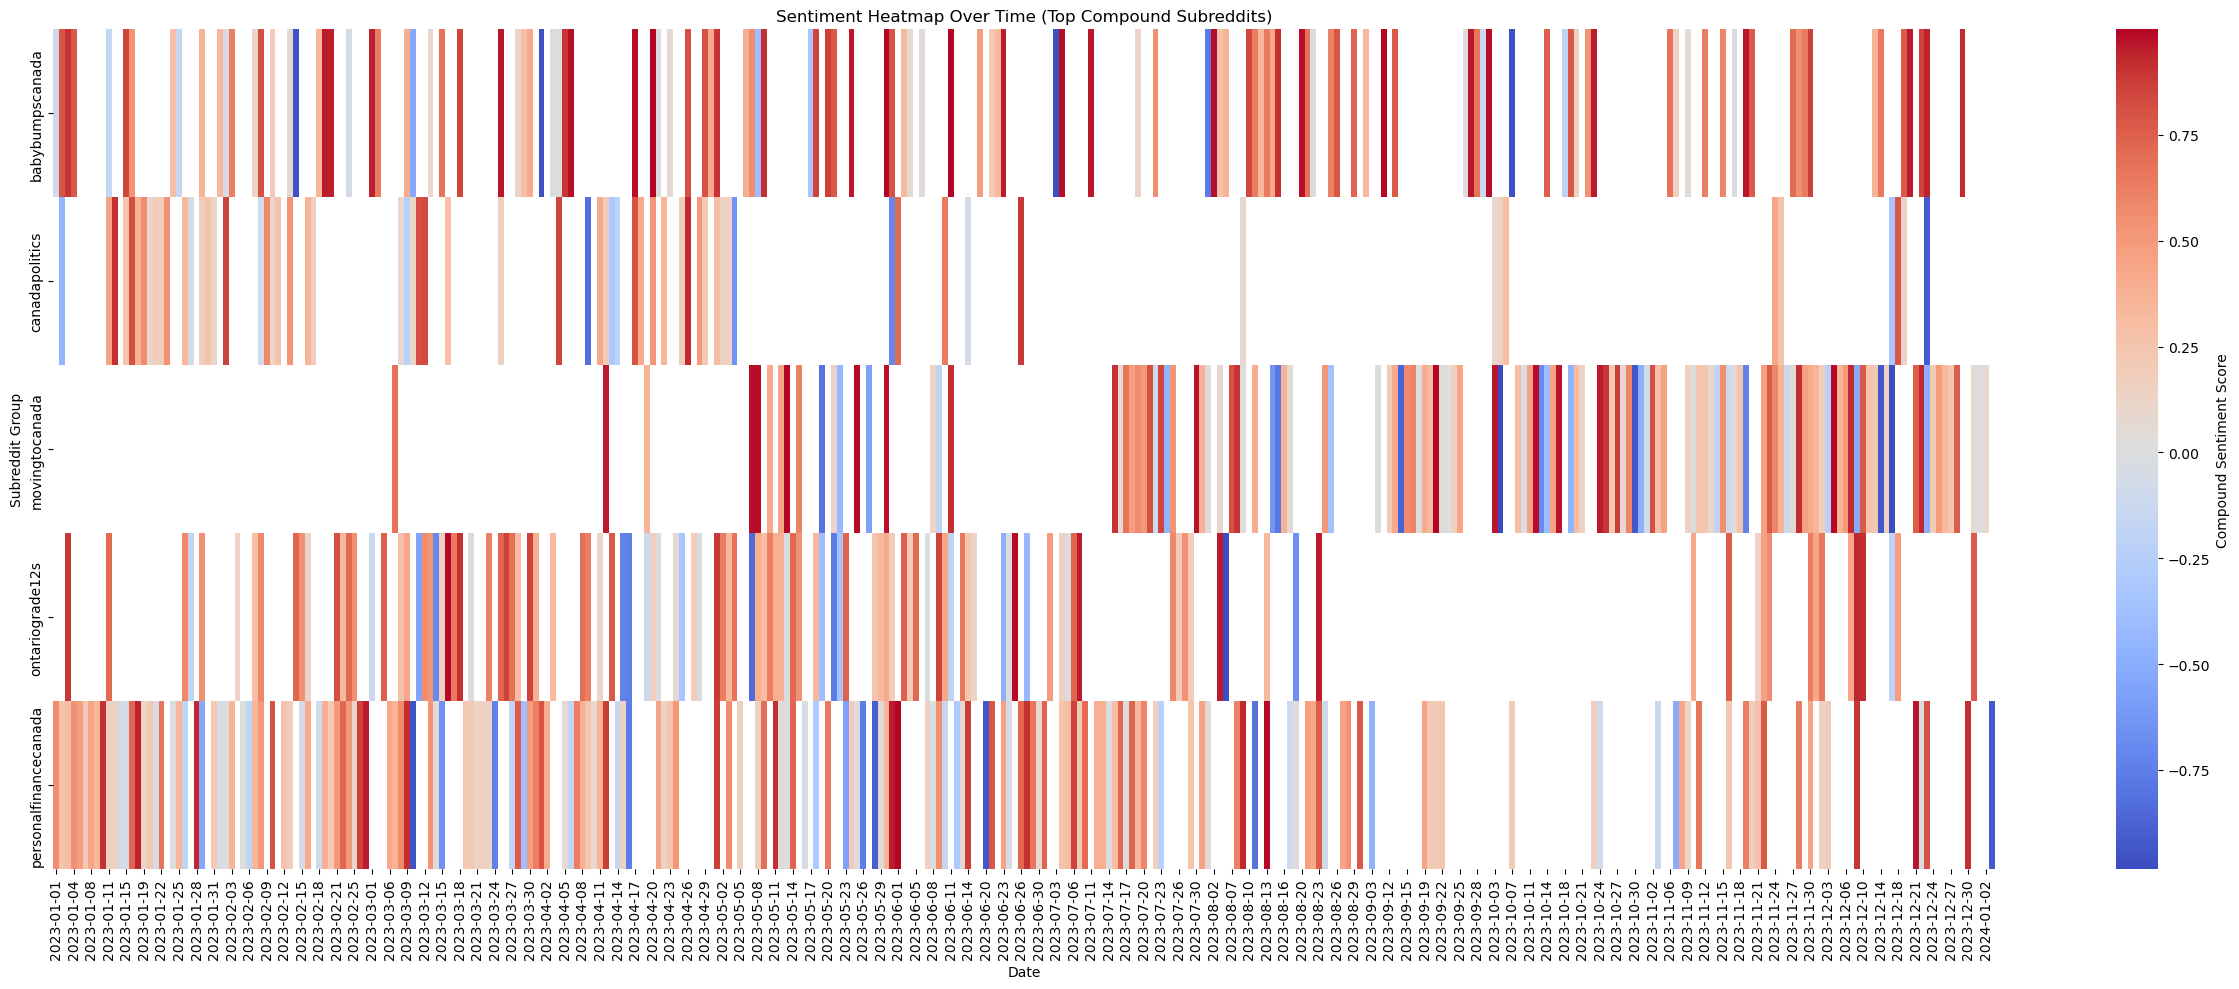

In [54]:
# Group data by day and calculate mean sentiment scores
filtered_data['date'] = filtered_data['time'].dt.date
grouped_data = filtered_data.groupby(['comment_subreddit_list', 'date']).mean().reset_index()

# Pivot the data to create a heatmap
heatmap_data = grouped_data.pivot(index='comment_subreddit_list', columns='date', values='density_compound')

# Plot heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Compound Sentiment Score'})
plt.xlabel('Date')
plt.ylabel('Subreddit Group')
plt.title('Sentiment Heatmap Over Time (Top Compound Subreddits)')
plt.tight_layout()
plt.show()
